In [1]:
#feature를 한 이미지에서 다른 이미지로 matching 시키는 것

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img,cmap='gray')

In [3]:
#이미지 읽어오기
reeses = cv2.imread('/content/drive/My Drive/vision/DATA/reeses_puffs.png',0)

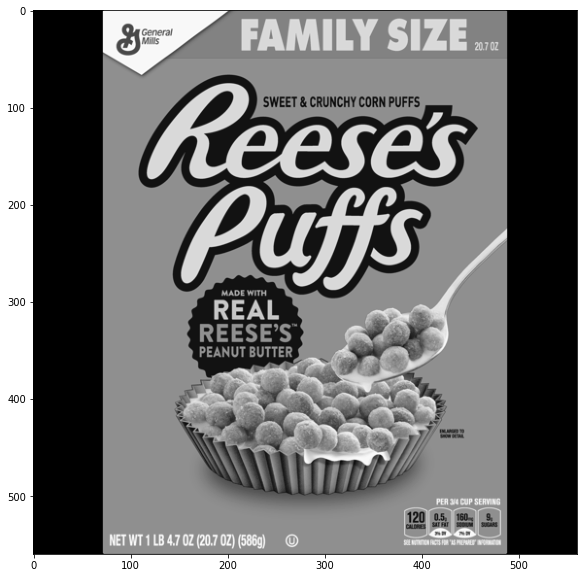

In [4]:
#시각화
display(reeses)

In [5]:
#시리얼 전체 이미지 출력
cereals = cv2.imread('/content/drive/My Drive/vision/DATA/many_cereals.jpg',0)

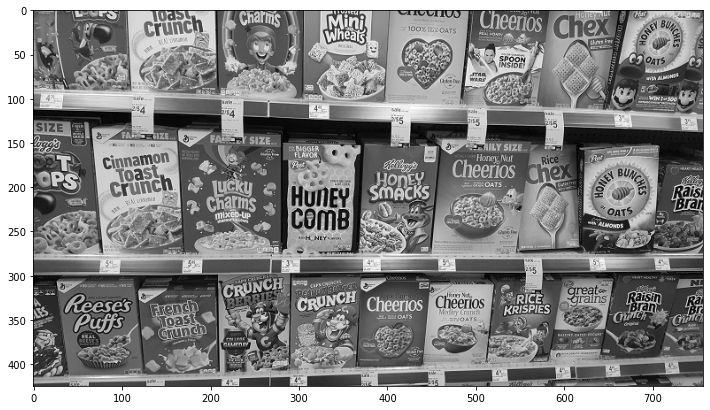

In [6]:
display(cereals)

In [7]:
orb = cv2.ORB_create()

In [8]:
#키포인트, descriptor -> 첫번째 셋에서 거리계산해서 두번째 세트의 다른 featrue와 일치시킨다.
#binary 기반
kp1,des1 = orb.detectAndCompute(reeses,None)
kp2,des2 = orb.detectAndCompute(cereals,None)

In [9]:
#normType - 사용할 거리 측정
#hamming distance -> 두 바이너리 값간의 거리
#crossCheck -> A의 i번째 설명자가 B의 j번째 설명자를 최상의 match로 가지도록 (i,j)값을 갖는 match만 리턴한다.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

In [10]:
#매칭된 오브젝트
#BFMatcher.match() -> 첫번째로 매칭되는 것 // BFMatcher.knnMatch() -> 지정된 k개의 최상의 match 반환
matches = bf.match(des1,des2)

In [11]:
#거리로 정렬하기
matches = sorted(matches, key=lambda x:x.distance)

In [12]:
#일치하는 포인트 그리기
#drawmatch knn -> k개의 가장 일치하는 것을 가져온다.
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

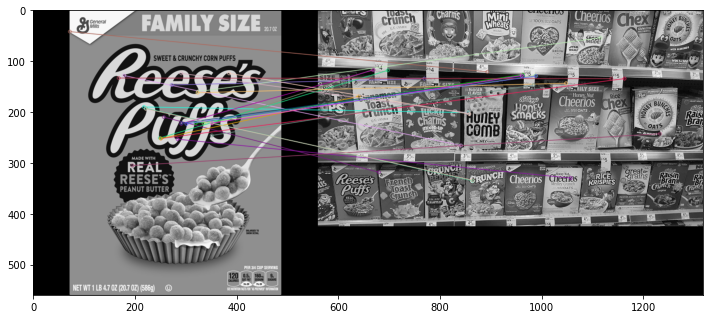

In [13]:
display(reeses_matches)